In [1]:
!pip install matplotlib
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,chi2

In [45]:
# This is a source code in Python
x2 = 87 # x0 = 83
p = 0.31 + x2/1000
n = 10000 # sample size
N = 10 # number of trial

Mean: 3.9533
Estimated p: 0.39533


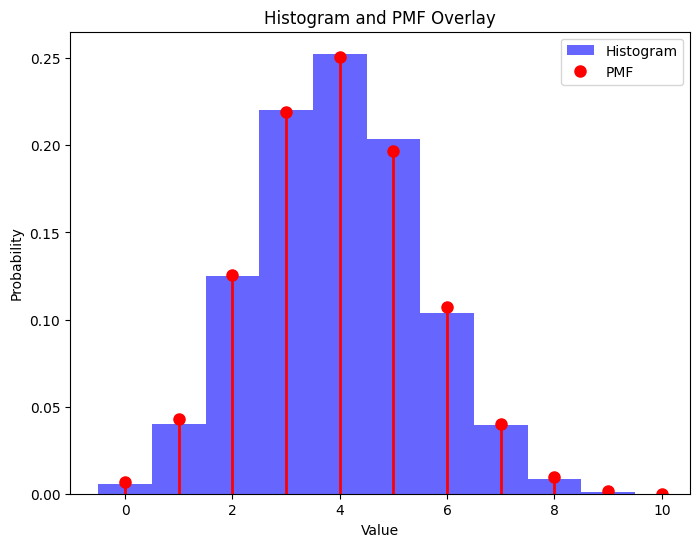

In [54]:
# Random sequence of Binomial RV .
X = np.random.binomial(N, p, n)
minX = X.min()
maxX = X.max()
e = np.arange(minX - 0.5, maxX + 1)
Mn = np.mean(X)
pn = Mn / N
print("Mean:", Mn)
print("Estimated p:", pn)

# PMF of Binomial Distributions
k = np.arange(0, N + 1)
PMF = binom.pmf(k, N, pn)

# สร้างกราฟซ้อนฮิสโตแกรมและ PMF
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot ฮิสโตแกรม
ax.hist(X, bins=e, density=True, alpha=0.6, color='b', label="Histogram")

# Plot PMF
ax.plot(k, PMF, 'ro', ms=8, label="PMF")
ax.vlines(k, 0, PMF, colors='r', lw=2)

ax.set_title("Histogram and PMF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.legend()

# แสดงกราฟ
plt.show()

In [62]:
#--3.5--
# Compute a statistics,Z
H = list(map(int,np.bincount(X)))
for j in np.arange(len(H), N + 1):
    H.append(0)
print("H =",H)
Z = 0
for j in range(N + 1):
    Z += (H[j] - n * PMF[j]) ** 2 / ( n * PMF[j])
print("Z =",'{:.4f}'.format(Z))

H = [58, 402, 1250, 2203, 2526, 2036, 1039, 392, 86, 8, 0]
Z = 11.3348


In [63]:
#--3.6--
m = len(e) - 1 # number of bins
print("Number of bins =", m)
r = 1 # estimated parameters
degfree = m - 1 - r # number degree of freedom
print("Number degrees of the freedom =",degfree)
alpha = 0.05
threshold_z_alpha = chi2.ppf(1 - alpha, degfree)
print("Threshold zα =", '{:.4f}'.format(threshold_z_alpha))
if Z < threshold_z_alpha:
    print("The candidate pmf is a good fit to the data")
else:
    print("The candidate pmf is not a good fit to the data")

Number of bins = 10
Number degrees of the freedom = 8
Threshold zα = 15.5073
The candidate pmf is a good fit to the data


In [64]:
#--4.7--
# หาค่า Sn
Sn = np.std(X, ddof = 1)
print("Sn =",'{:.4f}'.format(Sn))

Sn = 1.5174


In [65]:
#--4.8--
# หาค่า yα/2
y_alpha_div_2 = 1.960 #เทียบตาราง 6.2 L17
print("yα/2 = ",'{:.3f}'.format(y_alpha_div_2))

# คำนวณ confidence interval
delta = y_alpha_div_2 * Sn / np.sqrt(n)
confidence_interval_high = float(Mn + delta)
confidence_interval_low = float(Mn - delta)
print("Confidence interval for population mean m = " + 
      '[' + '{:.4f}'.format(confidence_interval_low) + 
      ',' + '{:.4f}'.format(confidence_interval_high) +']')

yα/2 =  1.960
Confidence interval for population mean m = [3.9236,3.9830]
